# Project 1

## MTA Turnstile Data

### Objective: To locate appropriate turnstile locations for street team contact work


In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print("pandas version:  ", pd.__version__)

pandas version:   1.0.5


In [3]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

### Import and load data
(Project Starter Challenge 1)

Source: [http://web.mta.info/developers/turnstile.html](http://web.mta.info/developers/turnstile.html)

In [4]:
# initial group code

# df_5_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
# df_5_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
# df_5_w3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
# df_5_w4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
# df_6_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
# df_6_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
# df_5_w1.shape

In [5]:
# df = pd.concat([df_5_w1, df_5_w2, df_5_w3, df_5_w4, df_6_w1, df_6_w2]).reset_index()
# df.shape

In [6]:
# Improved code from class discussion

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    df_list = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        df_list.append(pd.read_csv(file_url))
    return pd.concat(df_list)

week_nums = [190504, 190511, 190518, 190525, 190601, 190608]
init_df = get_data(week_nums)
init_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


In [7]:
init_df.shape

(1231795, 11)

### Create A Datetime Column
(Project Starter Challenge 2)

In [8]:
init_df['DATETIME'] = init_df['DATE'] + ' ' + init_df['TIME']
init_df['DATETIME'] = pd.to_datetime(init_df['DATETIME'])

init_df['DATE'] = pd.to_datetime(init_df['DATE'])
init_df['TIME'] = pd.to_datetime(init_df['TIME'])
init_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,2021-01-09 00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,2021-01-09 04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,2021-01-09 08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,2021-01-09 12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,2021-01-09 16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00


In [9]:
# clean up columns and column names
col_list = list(init_df.columns)
print(col_list)

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS                                                               ', 'DATETIME']


In [10]:
col_list = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
            'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATETIME']

In [19]:
init_df.columns = col_list

### Daily Entries For Each Turnstile
(Project Starter Challenge 3)

Group the data to represent daily entries for each turnstile, grouped by the combination of control area, remote unit, SCP, and station.

In [12]:
daily_ts_df = init_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])\
.agg('sum').reset_index()
daily_ts_df.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,7035249,2384833
1,A002,R051,02-00-00,59 ST,2019-04-27 04:00:00,7035269,2384840
2,A002,R051,02-00-00,59 ST,2019-04-27 08:00:00,7035292,2384875
3,A002,R051,02-00-00,59 ST,2019-04-27 12:00:00,7035392,2384951
4,A002,R051,02-00-00,59 ST,2019-04-27 16:00:00,7035651,2385020


The output of this daily entries and exits groupby indicates that the `ENTRIES` column is a cumulative running total, and not the number of entries per individual date.

Using the code from the in-class discussion, we attempted to confirm that there were no duplicate datetimes.  However, our group code still missed the duplicate entries.  This groupby should have been done on our initial imported data, not on our already completed daily entries groupby.  Below are both our original code and the correct code to find the duplicates.

In [13]:
# group code from in-class solution
# *BUT* still misses the duplicate entries

(daily_ts_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
.ENTRIES.count()
.reset_index()
.sort_values('ENTRIES', ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,1
821194,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-11 04:00:00,1
821192,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-10 20:00:00,1
821191,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-10 16:00:00,1
821190,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-10 12:00:00,1


In [14]:
# correct code to find duplicate entries

# (init_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
# .ENTRIES.count()
# .reset_index()
# .sort_values('ENTRIES', ascending=False)).head()

Since the `ENTRIES` column is a running total, we must subtract the previous day's entries from the current day's entries in order to obtain the actual daily entries number per turnstile per day.  

To avoid duplication per date, we take the first `ENTRIES` count per day, create a `PREV_ENTRIES` column, shift that column by one row, and then subtract.

In [16]:
# taking first entry for every day

df_daily = (init_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False)\
            .ENTRIES.first())
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27,7035249
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729


In [17]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = \
    (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE', 'ENTRIES']
     .apply(lambda grp: grp.shift(1)))


<ipython-input-17-2d8d0dcc5183>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE', 'ENTRIES']


This leaves an initial entry for each week period for which there is no `PREV_DATE` or `PREV_ENTRIES` to subtract.  So we drop these rows with `NaN` values in the `PREV_DATE` column.  Then we use a function to iterate through the rows and subtract to get the actual daily entries amounts.

In [18]:
print(df_daily.shape)
# drop rows for earliest date in df
df_daily.dropna(subset=['PREV_DATE'], axis = 0, inplace=True)
print(df_daily.shape)


(203009, 8)
(198127, 8)


In [19]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

In [20]:
df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
# df_daily[df_daily.DAILY_ENTRIES == df_daily.DAILY_ENTRIES.max()]
df_daily.head()

158 1087620.0
482 4317177.0
107 7245002.0
4050695 5903004.0
7246468 4050451.0
882 15418815.0
1435 4767402.0
335092671 3422305.0
412 3073070.0
161 4605408.0
681 6527713.0
569320813 4807409.0
279 9029146.0
65536 839317244.0
184608117 746094.0
80 2586370.0
238 2898346.0
50 1544092.0
607 3912014.0
196614 2998692.0
514 3755842.0
8 2020892.0
3003 6999467.0
408 8876564.0
1178879075 4471988.0
149 1252884.0
4666 2201975.0
14 1327005.0
196633 68461839.0
200 36966261.0
1017 2357557.0
12 4887309.0
7 9441168.0
1058702 102390686.0
393355 1661809141.0
10 7602347.0
1463 1068632.0
29 6332751.0
30933207 6069289.0
71 7192933.0
115 12739117.0
1122 6546797.0
16779493 81157.0
637574909 2502854.0
231 637595004.0
68859156 436510383.0
607126914 594465.0
140397413 1577638340.0
458752 100663296.0
23 203977549.0
452993428 1830432.0
259 7480462.0
20 3000575.0
683737068 458752.0
905996437 3558247.0
0 5176463.0
7 13653544.0
182 10462950.0
2063649382 8123310.0
1129054878 2501599.0


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100,2019-04-27,7.04e+06,851.0
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746,2019-04-28,7.04e+06,646.0
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242,2019-04-29,7.04e+06,1496.0
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729,2019-04-30,7.04e+06,1487.0
5,A002,R051,02-00-00,59 ST,2019-05-02,7041303,2019-05-01,7.04e+06,1574.0


### Plotting The Daily Time Series For A Single Turnstile
Project Starter Challenge 4

In [21]:
df_daily[df_daily.STATION == 'GRD CNTRL-42 ST'].UNIT.unique()

array(['R045', 'R046', 'R047', 'R048'], dtype=object)

In [22]:
df_daily[df_daily.STATION == 'GRD CNTRL-42 ST']['C/A'].unique()

array(['R236', 'R237', 'R237B', 'R238', 'R238A', 'R240', 'R241A'],
      dtype=object)

In [23]:
df_daily[df_daily.STATION == 'GRD CNTRL-42 ST'].SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-00-05', '00-03-00', '00-03-01', '00-03-02', '00-03-03',
       '00-06-00', '00-06-01', '01-00-00', '01-00-01', '01-00-02',
       '01-00-03', '01-00-04', '01-00-05', '01-00-06', '00-00-06',
       '00-00-07', '00-03-04', '00-05-00', '00-05-01', '00-06-02',
       '02-00-00', '02-00-01', '02-00-02', '02-00-03', '02-00-04',
       '02-03-00', '02-03-01', '02-03-02', '00-03-05', '00-03-06',
       '00-03-07', '00-03-08'], dtype=object)

In [24]:
single_turn = df_daily[(df_daily['C/A'] =='R236') & \
                       (df_daily['UNIT'] =='R045') & \
                       (df_daily['SCP'] == '00-00-00') & \
                       (df_daily['STATION'] == 'GRD CNTRL-42 ST')]

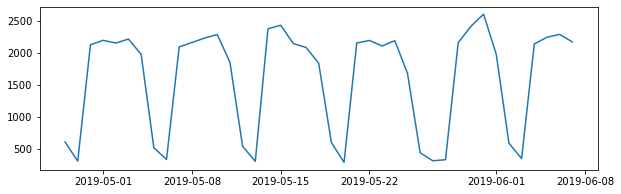

In [25]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'], single_turn['DAILY_ENTRIES']);

### Combining Turnstiles In The Same Control Area/Unit/Station Combo
(Project Starter Challenge 5)

In [26]:
df_combo = df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).agg({
    'DAILY_ENTRIES': 'sum',
    'PREV_ENTRIES': 'sum',
    'ENTRIES':'sum'}).reset_index()

In [27]:
df_combo.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,A002,R051,59 ST,2019-04-28,8394.0,5.51e+07,55118106
1,A002,R051,59 ST,2019-04-29,6337.0,5.51e+07,55124443
2,A002,R051,59 ST,2019-04-30,13132.0,5.51e+07,55137575
3,A002,R051,59 ST,2019-05-01,13664.0,5.51e+07,55151239
4,A002,R051,59 ST,2019-05-02,13748.0,5.52e+07,55164987


### Combining All Turnstiles In Each Station
(Project Starter Challenge 6)

In [28]:
df_sta_combo = df_daily.groupby(['STATION', 'DATE']).agg({
    'DAILY_ENTRIES': 'sum',
    'PREV_ENTRIES': 'sum',
    'ENTRIES':'sum'}).reset_index()

In [29]:
df_sta_combo.head()

,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,1 AV,2019-04-28,6338.0,1.41e+09,1413321232
1,1 AV,2019-04-29,4555.0,1.41e+09,1413325787
2,1 AV,2019-04-30,18018.0,1.41e+09,1413343805
3,1 AV,2019-05-01,18923.0,1.41e+09,1413362728
4,1 AV,2019-05-02,19226.0,1.41e+09,1413381954


### Plotting The Daily Time Series For A Station
(Project Starter Challenge 7)

In [30]:
df_183st = df_sta_combo[df_sta_combo.STATION == '183 ST'].reset_index()
df_183st.tail()

,index,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
36,1471,183 ST,2019-06-03,2981.0,3.15e+09,3150490145
37,1472,183 ST,2019-06-04,5813.0,3.15e+09,3150495958
38,1473,183 ST,2019-06-05,5333.0,3.15e+09,3150501291
39,1474,183 ST,2019-06-06,5883.0,3.15e+09,3150507174
40,1475,183 ST,2019-06-07,5601.0,3.15e+09,3150512775


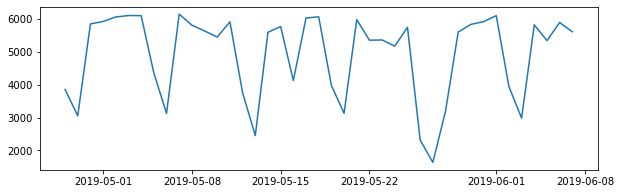

In [31]:
plt.figure(figsize=(10,3))
plt.plot(df_183st['DATE'], df_183st['DAILY_ENTRIES']);

### Stations With Highest Traffic
Finding the stations with the highest weekly average traffic

In [34]:
df_sta_combo['DATE_SHIFT'] = df_sta_combo['DATE'] + pd.DateOffset(days=-1)
df_sta_combo['WEEKDAY'] = df_sta_combo['DATE_SHIFT'].dt.day_name()
df_sta_combo['WEEK'] = df_sta_combo['DATE_SHIFT'].dt.week
print(df_sta_combo.WEEK.unique())
print(df_sta_combo.WEEK.value_counts())

[17 18 19 20 21 22 23]
22    2645
21    2640
20    2639
19    2637
18    2637
23    1506
17     754
Name: WEEK, dtype: int64


In [35]:
#remove weeks 17 and 23 since we do not have all 7 days of data on them
df_sta_combo_5wks = df_sta_combo[
    (df_sta_combo['WEEK'] !=17) &\
    (df_sta_combo['WEEK'] != 23)]
df_sta_combo_5wks = df_sta_combo_5wks.drop(['PREV_ENTRIES', 'ENTRIES'], axis=1, errors = 'ignore')
df_sta_combo_5wks.WEEK.value_counts()

22    2645
21    2640
20    2639
19    2637
18    2637
Name: WEEK, dtype: int64

In [36]:
df_sta_combo_5wks.head()

,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
2,1 AV,2019-04-30,18018.0,2019-04-29,Monday,18
3,1 AV,2019-05-01,18923.0,2019-04-30,Tuesday,18
4,1 AV,2019-05-02,19226.0,2019-05-01,Wednesday,18
5,1 AV,2019-05-03,19745.0,2019-05-02,Thursday,18
6,1 AV,2019-05-04,20046.0,2019-05-03,Friday,18


In [54]:
df_week_total = df_sta_combo_5wks.groupby(['STATION', 'WEEK']).agg('sum').reset_index()\
.rename(columns = {'DAILY_ENTRIES': 'WEEKLY_ENTRIES'})
print(df_week_total.WEEK.value_counts())
df_week_total.head()

22    378
21    378
20    377
19    377
18    377
Name: WEEK, dtype: int64


,STATION,WEEK,WEEKLY_ENTRIES
0,1 AV,18,107652.0
1,1 AV,19,106758.0
2,1 AV,20,108946.0
3,1 AV,21,107751.0
4,1 AV,22,92758.0


In [55]:
df_week_mean = df_week_total.groupby('STATION').agg('mean').reset_index()\
.rename(columns = {'WEEKLY_ENTRIES': 'AVG_WEEKLY_ENTRIES'})
df_week_mean.head()

,STATION,WEEK,AVG_WEEKLY_ENTRIES
0,1 AV,20.0,104773.0
1,103 ST,20.0,188559.4
2,103 ST-CORONA,20.0,125926.2
3,104 ST,20.0,27019.8
4,110 ST,20.0,66246.6


In [56]:
df_week_mean = df_week_mean.drop('WEEK', axis=1)

In [57]:
df_week_mean_sorted = df_week_mean.sort_values(by='AVG_WEEKLY_ENTRIES', ascending=False).reset_index()

In [59]:
df_week_mean_sorted.head()

,index,STATION,AVG_WEEKLY_ENTRIES
0,61,34 ST-PENN STA,1.06e+06
1,232,GRD CNTRL-42 ST,8.92e+05
2,314,PATH NEW WTC,8.46e+05
3,352,TIMES SQ-42 ST,8.08e+05
4,46,23 ST,7.65e+05


In [60]:
top_weekly_avg = df_week_mean_sorted.head(10)
top_weekly_avg

,index,STATION,AVG_WEEKLY_ENTRIES
0,61,34 ST-PENN STA,1.06e+06
1,232,GRD CNTRL-42 ST,8.92e+05
2,314,PATH NEW WTC,8.46e+05
3,352,TIMES SQ-42 ST,8.08e+05
4,46,23 ST,7.65e+05
5,59,34 ST-HERALD SQ,7.64e+05
6,14,14 ST-UNION SQ,7.32e+05
7,68,42 ST-PORT AUTH,6.53e+05
8,225,FULTON ST,6.26e+05
9,110,86 ST,6.19e+05


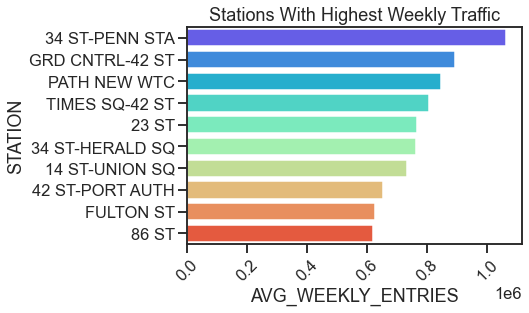

In [61]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = top_weekly_avg,
               y = 'STATION',
               x = 'AVG_WEEKLY_ENTRIES',
               palette = 'rainbow')

for item in g.get_xticklabels():
    item.set_rotation(45)

g.set_title('Stations With Highest Weekly Traffic')
g.figure.savefig('top_10_v.png', bbox_inches='tight')

### Plotting Daily Entries Week Over Week For A Single Station
(Project Starter Challenge 8)

In [70]:
station1 = '34 ST-PENN STA'
station2 = 'GRD CNTRL-42 ST'
station3 = 'PATH NEW WTC'
station4 = 'TIMES SQ-42 ST'

df_sta_combo_5wks.head()

,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
2,1 AV,2019-04-30,18018.0,2019-04-29,Monday,18
3,1 AV,2019-05-01,18923.0,2019-04-30,Tuesday,18
4,1 AV,2019-05-02,19226.0,2019-05-01,Wednesday,18
5,1 AV,2019-05-03,19745.0,2019-05-02,Thursday,18
6,1 AV,2019-05-04,20046.0,2019-05-03,Friday,18


In [78]:
filtered_by_station = df_sta_combo_5wks[(df_sta_combo_5wks.STATION == station1) |
                               (df_sta_combo_5wks.STATION == station2) |
                                (df_sta_combo_5wks.STATION == station3) |
                                 (df_sta_combo_5wks.STATION == station4)]

In [79]:
filtered_by_station_reduced_max = filtered_by_station[filtered_by_station.DAILY_ENTRIES < 0.5e+06]

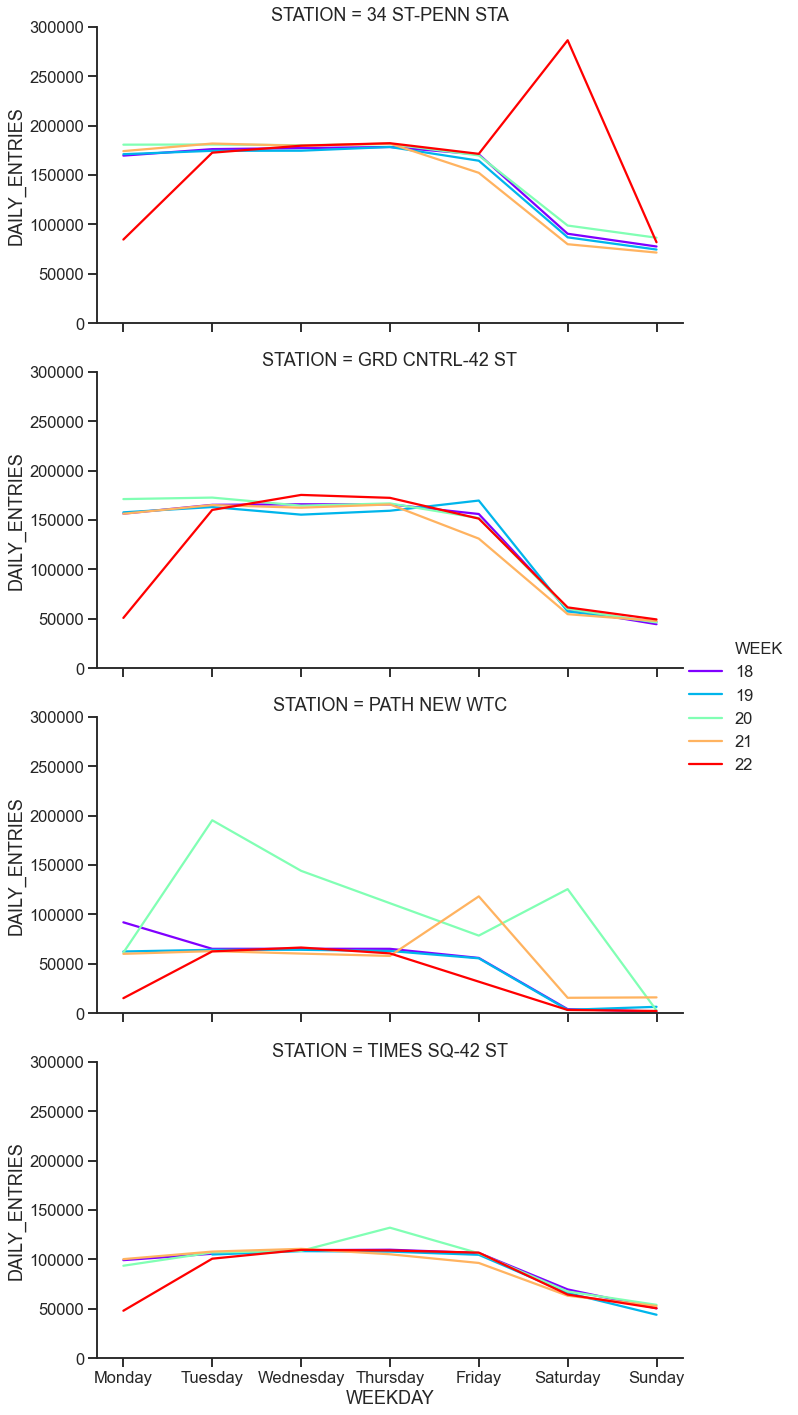

In [80]:
g = sns.relplot(data = filtered_by_station_reduced_max, 
            x = 'WEEKDAY', 
            y = 'DAILY_ENTRIES',
           row = 'STATION',
            hue = 'WEEK',
            kind = 'line',
            sort = False,
            aspect = 2,
            palette = 'rainbow',
            legend = 'full'
           )
plt.ylim(0, 300000)
g.savefig('weekday_by_station.png', bbox_inches = 'tight')

In [132]:
#revised version of the weekly graphs (not included in slides) to 
#illustrate overall weekly trend in the top 10 stations 

top_10_stations = list(top_weekly_avg.STATION)
non_top_10_stations = [station for station in df_week_mean_sorted.STATION if station not in top_10_stations]

top_10_station_daily_entry = df_sta_combo_5wks.copy().drop(['DATE', 'DATE_SHIFT', 'WEEK'], axis = 1)

for station in non_top_10_stations:
    top_10_station_daily_entry = top_10_station_daily_entry[top_10_station_daily_entry.STATION != station]

top_10_station_daily_entry.head()

,STATION,DAILY_ENTRIES,WEEKDAY
576,14 ST-UNION SQ,102958.0,Monday
577,14 ST-UNION SQ,107610.0,Tuesday
578,14 ST-UNION SQ,109688.0,Wednesday
579,14 ST-UNION SQ,110267.0,Thursday
580,14 ST-UNION SQ,110841.0,Friday


In [133]:
mean_daily_entries_by_weekday = top_10_station_daily_entry.groupby('WEEKDAY').agg('mean').reset_index()
mean_daily_entries_by_weekday

,WEEKDAY,DAILY_ENTRIES
0,Friday,147966.88
1,Monday,119516.66
2,Saturday,67825.02
3,Sunday,48789.60
4,Thursday,143004.00
5,Tuesday,120432.88
6,Wednesday,129369.18


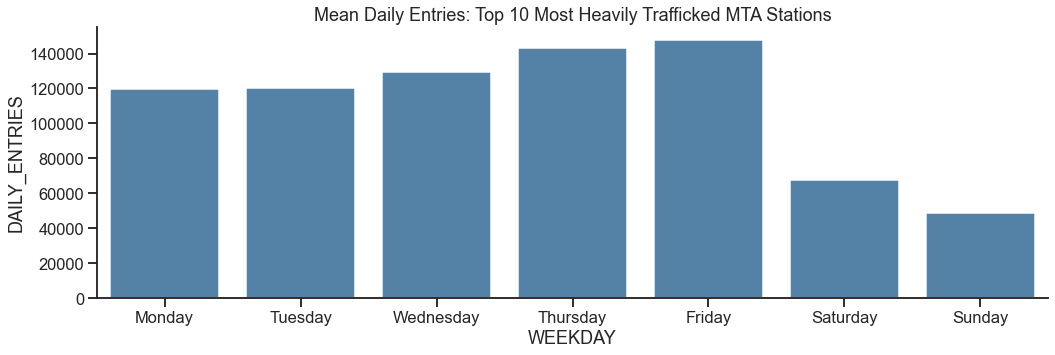

In [134]:
sns.catplot(data = mean_daily_entries_by_weekday, x = 'WEEKDAY', y = 'DAILY_ENTRIES', color = '#4682B4',
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           kind = 'bar', aspect = 3)
plt.title('Mean Daily Entries: Top 10 Most Heavily Trafficked MTA Stations');

# Missing Single Day Single Turnstiles Here

###  A Single Day's Entries for a Single Station By Unit

In [52]:
df_single_day = df_daily[(df_daily.STATION == 'GRD CNTRL-42 ST') &\
                        (df_daily.DATE == '2019-05-15') &\
                        (df_daily.ENTRIES != 0)]
df_single_day.DAILY_ENTRIES.mean()

2739.9841269841268

In [53]:
# Grouping the turnstiles by unit
df_single_day_unit = df_single_day.groupby('UNIT').agg('sum').reset_index()
df_single_day_unit.head()

,UNIT,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,R045,61899707,6.19e+07,29184.0
1,R046,1763074430,1.76e+09,80886.0
2,R047,100251170,1.00e+08,47352.0
3,R048,20421471,2.04e+07,15197.0


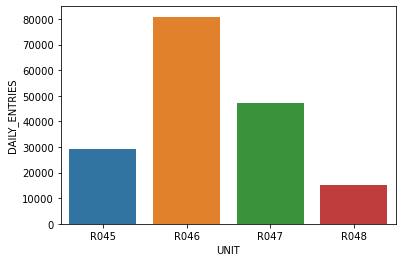

In [54]:
# plotting single day, single station, by unit
sns.barplot(data=df_single_day_unit, x = 'UNIT', y ='DAILY_ENTRIES');

### Identifying Highest Average Turnstiles at Highest Average Stations


In the process of calculating highest average turnstiles at highest average stations, it became clear that the cutoff threshold for outliers (`max_counter = 1000000`) wasn't sufficiently stringent.

Operating on the assumption that turnstiles could likely not process more than one commuter per second, we reset the `max_counter` value to 864000, or the number of seconds in a day.

In [139]:
df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=864000)
df_daily.head()

158 1087620.0
482 4317177.0
107 7245002.0
4050695 5903004.0
7246468 4050451.0
882 15418815.0
1435 4767402.0
335092671 3422305.0
412 3073070.0
161 4605408.0
681 6527713.0
569320813 4807409.0
279 9029146.0
65536 839317244.0
184608117 746094.0
80 2586370.0
238 2898346.0
50 1544092.0
607 3912014.0
196614 2998692.0
514 3755842.0
8 2020892.0
3003 6999467.0
408 8876564.0
1178879075 4471988.0
149 1252884.0
706 899109.0
4666 2201975.0
14 1327005.0
196633 68461839.0
200 36966261.0
1017 2357557.0
12 4887309.0
7 9441168.0
1058702 102390686.0
393355 1661809141.0
10 7602347.0
1463 1068632.0
29 6332751.0
30933207 6069289.0
71 7192933.0
115 12739117.0
1122 6546797.0
16779493 81157.0
637574909 2502854.0
231 637595004.0
68859156 436510383.0
607126914 594465.0
140397413 1577638340.0
458752 100663296.0
23 203977549.0
452993428 1830432.0
259 7480462.0
20 3000575.0
683737068 458752.0
905996437 3558247.0
0 5176463.0
7 13653544.0
182 10462950.0
2063649382 8123310.0
1129054878 2501599.0


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100,2019-04-27,7.04e+06,851.0
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746,2019-04-28,7.04e+06,646.0
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242,2019-04-29,7.04e+06,1496.0
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729,2019-04-30,7.04e+06,1487.0
5,A002,R051,02-00-00,59 ST,2019-05-02,7041303,2019-05-01,7.04e+06,1574.0


In [157]:
weekday_ts = df_daily.drop(['PREV_DATE','PREV_ENTRIES', 'ENTRIES'], axis = 1)
weekday_ts.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-04-28,851.0
2,A002,R051,02-00-00,59 ST,2019-04-29,646.0
3,A002,R051,02-00-00,59 ST,2019-04-30,1496.0
4,A002,R051,02-00-00,59 ST,2019-05-01,1487.0
5,A002,R051,02-00-00,59 ST,2019-05-02,1574.0


In [159]:
weekday_ts['DATE_SHIFT'] = weekday_ts['DATE'] + pd.DateOffset(days=1)
weekday_ts['WEEKDAY'] = weekday_ts['DATE_SHIFT'].dt.day_name()
weekday_ts['WEEK'] = weekday_ts['DATE_SHIFT'].dt.week
weekday_ts.head()

<ipython-input-159-5fec1e4ed6b9>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekday_ts['WEEK'] = weekday_ts['DATE_SHIFT'].dt.week


,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
1,A002,R051,02-00-00,59 ST,2019-04-28,851.0,2019-04-29,Monday,18
2,A002,R051,02-00-00,59 ST,2019-04-29,646.0,2019-04-30,Tuesday,18
3,A002,R051,02-00-00,59 ST,2019-04-30,1496.0,2019-05-01,Wednesday,18
4,A002,R051,02-00-00,59 ST,2019-05-01,1487.0,2019-05-02,Thursday,18
5,A002,R051,02-00-00,59 ST,2019-05-02,1574.0,2019-05-03,Friday,18


In [160]:
# breaking out combined turnstile data for each station

ts_df_penn = weekday_ts[weekday_ts['STATION'] =='34 ST-PENN STA']
ts_df_gct = weekday_ts[weekday_ts['STATION'] =='GRD CNTRL-42 ST']
ts_df_timesq = weekday_ts[weekday_ts['STATION'] =='TIMES SQ-42 ST']
ts_df_34herald = weekday_ts[weekday_ts['STATION'] =='34 ST-HERALD SQ']

In [161]:
# sum SCP turnstiles by week, keeping station, unit, c/a labels

ts_df_penn_wksum = ts_df_penn.groupby(['SCP', 'WEEK']).agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT': 'first',
    'DAILY_ENTRIES':'sum'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_penn_wksum.head()

,SCP,WEEK,STATION,C/A,UNIT,DAILY_ENTRIES
0,00-03-04,23,34 ST-PENN STA,N067,R012,231745.0
1,00-00-04,21,34 ST-PENN STA,N067,R012,57387.0
2,00-00-04,20,34 ST-PENN STA,N067,R012,56736.0
3,00-00-04,19,34 ST-PENN STA,N067,R012,55159.0
4,00-00-04,18,34 ST-PENN STA,N067,R012,55150.0


In [162]:
# sum SCP turnstiles by week, keeping station, unit, c/a labels

ts_df_gct_wksum = ts_df_gct.groupby(['SCP', 'WEEK']).agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT': 'first',
    'DAILY_ENTRIES':'sum'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_gct_wksum.head()

,SCP,WEEK,STATION,C/A,UNIT,DAILY_ENTRIES
0,00-03-03,18,GRD CNTRL-42 ST,R236,R045,65165.0
1,02-00-04,20,GRD CNTRL-42 ST,R238A,R046,61925.0
2,00-00-01,18,GRD CNTRL-42 ST,R236,R045,60822.0
3,00-00-01,19,GRD CNTRL-42 ST,R236,R045,58666.0
4,00-00-01,21,GRD CNTRL-42 ST,R236,R045,57859.0


In [163]:
# sum SCP turnstiles by week, keeping station, unit, c/a labels

ts_df_timesq_wksum = ts_df_timesq.groupby(['SCP', 'WEEK']).agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT': 'first',
    'DAILY_ENTRIES':'sum'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_timesq_wksum.head()

,SCP,WEEK,STATION,C/A,UNIT,DAILY_ENTRIES
0,00-00-07,19,TIMES SQ-42 ST,R151,R033,876469.0
1,00-00-01,18,TIMES SQ-42 ST,R145,R032,43787.0
2,01-00-00,20,TIMES SQ-42 ST,A021,R032,41787.0
3,00-00-01,19,TIMES SQ-42 ST,R145,R032,41528.0
4,01-00-00,21,TIMES SQ-42 ST,A021,R032,41275.0


In [164]:
# sum SCP turnstiles by week, keeping station, unit, c/a labels

ts_df_34herald_wksum = ts_df_34herald.groupby(['SCP', 'WEEK']).agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT': 'first',
    'DAILY_ENTRIES':'sum'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_34herald_wksum.head()

,SCP,WEEK,STATION,C/A,UNIT,DAILY_ENTRIES
0,01-00-02,20,34 ST-HERALD SQ,A022,R022,55110.0
1,01-00-02,21,34 ST-HERALD SQ,A022,R022,54995.0
2,01-00-02,18,34 ST-HERALD SQ,A022,R022,54605.0
3,01-00-02,19,34 ST-HERALD SQ,A022,R022,54222.0
4,01-00-01,21,34 ST-HERALD SQ,A022,R022,53388.0


In [165]:
# create SCP_UNIT_CA column and label

ts_df_penn_wksum['SCP_UNIT_CA'] = ts_df_penn_wksum['SCP'] \
+ ' ' + ts_df_penn_wksum['UNIT'] + ' ' \
+ ts_df_penn_wksum['C/A']

ts_df_gct_wksum['SCP_UNIT_CA'] = ts_df_gct_wksum['SCP'] \
+ ' ' + ts_df_gct_wksum['UNIT'] + ' ' \
+ ts_df_gct_wksum['C/A']

ts_df_timesq_wksum['SCP_UNIT_CA'] = ts_df_timesq_wksum['SCP'] \
+ ' ' + ts_df_timesq_wksum['UNIT'] + ' ' \
+ ts_df_timesq_wksum['C/A']

ts_df_34herald_wksum['SCP_UNIT_CA'] = ts_df_34herald_wksum['SCP'] \
+ ' ' + ts_df_34herald_wksum['UNIT'] + ' ' \
+ ts_df_34herald_wksum['C/A']

In [166]:
# use turnstile weekly sums to determine turnstile weekly averages
ts_df_penn_wkmean = ts_df_penn_wksum.groupby('SCP_UNIT_CA').agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT':'first',
    'DAILY_ENTRIES':'mean'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()

ts_df_penn_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_penn_wkmean['DAILY_ENTRIES']

ts_df_penn_wkmean = ts_df_penn_wkmean.drop(columns = [
    'WEEK', 
    'DAILY_ENTRIES'], errors='ignore')

ts_df_penn_wkmean.head()

,SCP_UNIT_CA,STATION,C/A,UNIT,AVG_WEEKLY_ENTRIES
0,00-03-04 R012 N067,34 ST-PENN STA,N067,R012,70306.0
1,00-00-04 R012 N067,34 ST-PENN STA,N067,R012,53353.0
2,00-00-03 R012 N067,34 ST-PENN STA,N067,R012,49053.0
3,00-00-01 R012 N067,34 ST-PENN STA,N067,R012,46599.0
4,00-00-02 R012 N067,34 ST-PENN STA,N067,R012,40522.0


In [167]:
# use turnstile weekly sums to determine turnstile weekly averages
ts_df_gct_wkmean = ts_df_gct_wksum.groupby('SCP_UNIT_CA').agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT':'first',
    'DAILY_ENTRIES':'mean'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()

ts_df_gct_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_gct_wkmean['DAILY_ENTRIES']

ts_df_gct_wkmean = ts_df_gct_wkmean.drop(columns = [
    'WEEK', 
    'DAILY_ENTRIES'], errors='ignore')

ts_df_gct_wkmean.head()

,SCP_UNIT_CA,STATION,C/A,UNIT,AVG_WEEKLY_ENTRIES
0,00-00-01 R045 R236,GRD CNTRL-42 ST,R236,R045,55566.50
1,02-00-04 R046 R238A,GRD CNTRL-42 ST,R238A,R046,49215.33
2,00-00-00 R045 R236,GRD CNTRL-42 ST,R236,R045,48589.17
3,02-00-03 R046 R238A,GRD CNTRL-42 ST,R238A,R046,42752.00
4,02-03-01 R046 R238A,GRD CNTRL-42 ST,R238A,R046,39523.00


In [168]:
# use turnstile weekly sums to determine turnstile weekly averages
ts_df_timesq_wkmean = ts_df_timesq_wksum.groupby('SCP_UNIT_CA').agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT':'first',
    'DAILY_ENTRIES':'mean'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()

ts_df_timesq_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_timesq_wkmean['DAILY_ENTRIES']

ts_df_timesq_wkmean = ts_df_timesq_wkmean.drop(columns = [
    'WEEK', 
    'DAILY_ENTRIES'], errors='ignore')

ts_df_timesq_wkmean.head()

,SCP_UNIT_CA,STATION,C/A,UNIT,AVG_WEEKLY_ENTRIES
0,00-00-07 R033 R151,TIMES SQ-42 ST,R151,R033,163036.17
1,00-00-01 R032 R145,TIMES SQ-42 ST,R145,R032,39750.83
2,01-00-00 R032 A021,TIMES SQ-42 ST,A021,R032,39461.17
3,01-00-01 R032 A021,TIMES SQ-42 ST,A021,R032,30491.67
4,00-00-02 R032 R145,TIMES SQ-42 ST,R145,R032,30179.67


In [169]:
# use turnstile weekly sums to determine turnstile weekly averages
ts_df_34herald_wkmean = ts_df_34herald_wksum.groupby('SCP_UNIT_CA').agg({
    'STATION':'first',
    'C/A':'first',
    'UNIT':'first',
    'DAILY_ENTRIES':'mean'
}).sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()

ts_df_34herald_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_34herald_wkmean['DAILY_ENTRIES']

ts_df_34herald_wkmean = ts_df_34herald_wkmean.drop(columns = [
    'WEEK', 
    'DAILY_ENTRIES'], errors='ignore')

ts_df_34herald_wkmean.head()

,SCP_UNIT_CA,STATION,C/A,UNIT,AVG_WEEKLY_ENTRIES
0,01-00-02 R022 A022,34 ST-HERALD SQ,A022,R022,52681.33
1,01-00-01 R022 A022,34 ST-HERALD SQ,A022,R022,50177.33
2,01-00-00 R022 A022,34 ST-HERALD SQ,A022,R022,48545.33
3,00-05-05 R022 N506,34 ST-HERALD SQ,N506,R022,34448.67
4,00-05-04 R022 N506,34 ST-HERALD SQ,N506,R022,29471.17


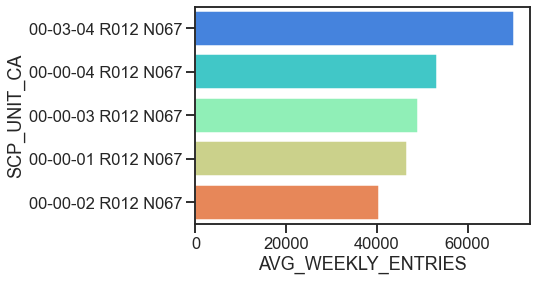

In [170]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_penn_wkmean.head(), 
                y = 'SCP_UNIT_CA', 
                x = 'AVG_WEEKLY_ENTRIES', 
                palette = 'rainbow')

#g.set_title('Turnstiles: 34th St Penn Station - Highest Weekly Average')
g.figure.savefig('top_5_ts_penn.png', bbox_inches='tight')

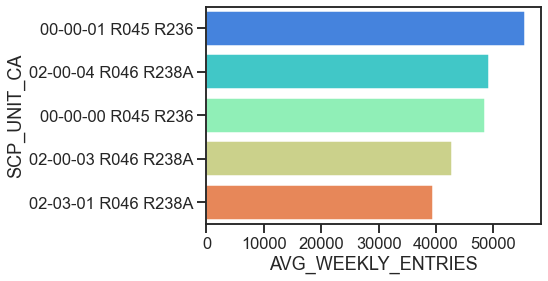

In [171]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_gct_wkmean.head(), 
                y = 'SCP_UNIT_CA', 
                x = 'AVG_WEEKLY_ENTRIES', 
                palette = 'rainbow')

#g.set_title('Turnstiles: Grand Central 42nd St - Highest Weekly Average')
g.figure.savefig('top_5_ts_gct.png', bbox_inches='tight')

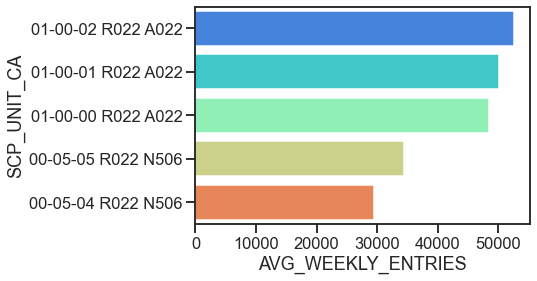

In [172]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_34herald_wkmean.head(), 
                y = 'SCP_UNIT_CA', 
                x = 'AVG_WEEKLY_ENTRIES', 
                palette = 'rainbow')

#g.set_title('Turnstiles: 34th St Herald Square - Highest Weekly Average')
g.figure.savefig('top_5_ts_34herald.png', bbox_inches='tight')

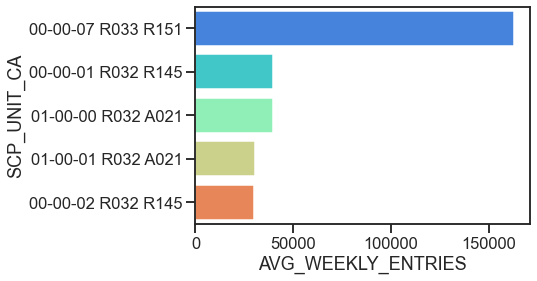

In [173]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_timesq_wkmean.head(), 
                y = 'SCP_UNIT_CA', 
                x = 'AVG_WEEKLY_ENTRIES', 
                palette = 'rainbow')

#g.set_title('Turnstiles: Times Square 42nd St - Highest Weekly Average')
g.figure.savefig('top_5_ts_timesq.png', bbox_inches='tight')